### CSC 478
### Assignment 3
### George Nakhleh

**1a)**
- Load and preprocess the data using pandas or numpy  
- Compute and display basic stats (mean, std dev, min, max, etc) for each variable in the dataset  
- Separate the target variable (`"ViolentCrimesPerPop"`) from the dataset

In [1]:
#Bring in libraries/modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load in the data
communities_df = pd.read_csv('communities\\communities.csv')

In [3]:
communities_df.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
communities_df.shape  #100 variables, 1994 records

(1994, 100)

In [5]:
communities_df.columns

Index(['state', 'communityname', 'population', 'householdsize', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
       'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'P

In [6]:
#Are there any columns w/ missing values?

np.sum(np.array(pd.isnull(communities_df)),0)  #1 missing value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
communities_df.dtypes #all but 2 variables are float type

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [8]:
communities_df.OtherPerCap.head(100) #should be a float

0     0.36
1     0.22
2     0.28
3     0.36
4     0.51
5     0.48
6     0.24
7     0.18
8     0.29
9     0.17
10    0.34
11    0.35
12    0.17
13    0.13
14    0.28
15    0.33
16     0.2
17       1
18    0.72
19       0
20    0.24
21    0.28
22    0.17
23    0.19
24    0.18
25     0.3
26    0.28
27     0.2
28       0
29    0.38
      ... 
70    0.55
71    0.24
72    0.13
73    0.95
74    0.24
75    0.21
76    0.26
77    0.17
78     0.2
79    0.35
80    0.25
81    0.21
82    0.21
83    0.03
84    0.13
85       0
86    0.15
87    0.45
88     0.3
89    0.27
90    0.26
91    0.33
92       0
93    0.27
94    0.35
95    0.29
96    0.17
97    0.08
98    0.35
99    0.26
Name: OtherPerCap, dtype: object

In [9]:
communities_df.OtherPerCap.unique() #value '?' is holding us up

array(['0.36', '0.22', '0.28', '0.51', '0.48', '0.24', '0.18', '0.29',
       '0.17', '0.34', '0.35', '0.13', '0.33', '0.2', '1', '0.72', '0',
       '0.19', '0.3', '0.38', '0.14', '0.26', '0.64', '0.25', '0.37',
       '0.16', '0.15', '0.76', '0.4', '0.42', '0.23', '0.31', '0.32',
       '0.5', '0.66', '0.21', '0.7', '0.27', '0.11', '0.55', '0.95',
       '0.03', '0.45', '0.08', '0.43', '0.62', '0.02', '0.41', '?', '0.39',
       '0.88', '0.71', '0.44', '0.47', '0.09', '0.53', '0.1', '0.46',
       '0.05', '0.52', '0.75', '0.06', '0.93', '0.12', '0.77', '0.69',
       '0.86', '0.73', '0.67', '0.84', '0.81', '0.54', '0.59', '0.01',
       '0.68', '0.98', '0.04', '0.61', '0.9', '0.57', '0.49', '0.56',
       '0.07', '0.92', '0.6', '0.94', '0.63', '0.87', '0.79', '0.99',
       '0.58', '0.83', '0.85', '0.8', '0.82', '0.74', '0.65', '0.89'], dtype=object)

In [10]:
communities_df.OtherPerCap = pd.to_numeric(communities_df.OtherPerCap, errors='coerce') #coerce arg turns failures into NAN


In [11]:
communities_df.dtypes #worked

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap              float64
HispPerCap               float64
NumUnderPov              float64
          

In [12]:
#For good measure, drop any rows w/ NA
communities_df = communities_df.dropna(axis=0)

In [13]:
#Dispaly some summary stats for each variable
pd.options.display.max_rows = 300
pd.options.display.max_columns = 130
communities_df.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,28.683894,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,0.064104,0.696618,0.361259,0.558314,0.291540,0.495780,0.471044,0.317546,0.479242,0.375805,0.350336,0.368073,0.291169,0.203567,0.322333,0.284742,0.386157,0.055509,0.302750,0.315695,0.383251,0.361711,0.363281,0.501229,0.396427,0.440552,0.461164,0.434451,0.487501,0.494195,0.487747,0.611124,0.620868,0.664300,0.583081,0.501405,0.526703,0.036292,0.249694,0.030075,0.320261,0.360723,0.399212,0.428038,0.181450,0.182218,0.184867,0.182970,0.785805,0.150652,0.267602,0.251897,0.462132,0.494496,0.404064,0.562619,0.186272,0.495203,0.314601,0.076829,0.719649,0.548685,0.204476,0.433211,0.494235,0.264355,0.242905,0.264792,0.263593,0.269037,0.346553,0.372614,0.423121,0.384240,0.490070,0.449759,0.403638,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.237983
std,16.401661,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,0.128280,0.444648,0.209327,0.182820,0.204155,0.178067,0.173616,0.221951,0.167606,0.198224,0.191118,0.186848,0.171607,0.164793,0.195457,0.191008,0.183045,0.127973,0.228202,0.213354,0.202528,0.209239,0.201916,0.173940,0.202427,0.175490,0.182471,0.175481,0.175189,0.183620,0.154633,0.201817,0.206190,0.218477,0.191353,0.168642,0.175284,0.108698,0.229610,0.087209,0.219132,0.210929,0.201458,0.194889,0.235819,0.236357,0.236762,0.234846,0.226884,0.219752,0.196616,0.190756,0.169588,0.157935,0.189343,

In [14]:
#Create two arrays: one is the target variable, and the other is all possible predictors
y = np.array(communities_df.ViolentCrimesPerPop)
X = np.array(communities_df.drop(['ViolentCrimesPerPop', 'state', 'communityname'], axis=1)) #will also drop state and community name

In [15]:
X[1, :] ;

In [16]:
y

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [17]:
X.shape

(1993, 97)

In [18]:
y.shape

(1993,)

**1b) Linear regression**  
- Perform standard linear regression on the data using the implementation for Ch8 of MLA.  
- Compute the RMSE value on the full training data.  
- Plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficient (weights).  
- Perform 10-fold cross validation using the learned model and compare the final RMSE to the training RMSE (can use `sklearn.cross_validation`)

In [55]:
#A function for getting the weights, as shown in CH. 8

from numpy import *

#we need to add a row of 1's to the X matrix since we want a constant in the model
x_var = np.array(X)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])

def standRegres(xArr, yArr):
    xMat = np.matrix(xArr) ; yMat = np.matrix(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
    else:
        ws = xTx.I * (xMat.T*yMat)
        return ws

ws = standRegres(x_var, y)

In [56]:
#Show the weights for the regression line
ws

matrix([[  5.33282015e-01],
        [  2.98023399e-01],
        [ -1.55143953e-01],
        [  1.15786671e+00],
        [ -4.29312753e-01],
        [  1.10690568e+00],
        [ -2.77393994e+00],
        [ -7.87377477e-01],
        [  3.15327507e-01],
        [  1.62518109e+00],
        [  5.73476416e-01],
        [ -1.06019938e-02],
        [ -3.18790775e+00],
        [ -3.60799738e-01],
        [  1.66389441e-01],
        [ -8.16483439e-02],
        [  3.94817387e+00],
        [ -6.03725888e+00],
        [  3.43653441e+00],
        [  9.79503832e-01],
        [  2.43641409e-01],
        [  1.20726520e-01],
        [ -9.71714803e-01],
        [ -2.86544492e+00],
        [  1.14889851e+00],
        [  2.90948874e-01],
        [ -2.28927421e-01],
        [ -1.29360323e-01],
        [  3.88932082e+00],
        [  9.88922464e-01],
        [ -1.34992375e+00],
        [ -3.49191038e-01],
        [  9.16054597e-01],
        [ -2.25392171e+00],
        [ -3.57545952e-01],
        [ -1.7548051

In [57]:
#Get predicted values

xMat = np.matrix(x_var)
yMat = np.matrix(y)
yHat = xMat*ws

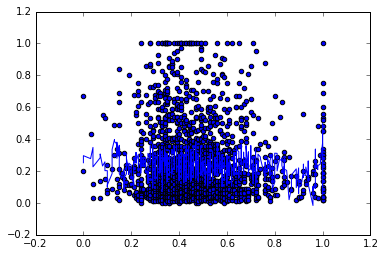

In [58]:
#Plot to clarify the results

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0], yMat.T[:,0].flatten().A[0])

xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws

ax.plot(xCopy[:,1], yHat)
plt.show()   #Definitely overfit, not even linear

In [59]:
#Calculate RMSE
RMSE = np.sqrt(np.mean((yMat-yHat)**2))
RMSE #considering the range of values, this is very bad

nan

In [60]:
#Try a different method for rmse


yHat = x_var*ws
yHatT = yHat.T

err = abs(yHatT - y)

total_error = np.dot(err,err.T)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train)  #A totally different number than other method ... 

[[ 0.22680992]]


In [24]:
#Calculate the correlation coefficient
corrcoef(yHat.T, yMat) #weak negative correlation. In other words: bad regression model

array([[ 1.        , -0.02619469],
       [-0.02619469,  1.        ]])

Use cross-validation and compare RMSE w/ previous run

In [25]:
X_array = np.array(X)
y_array = np.array(y)

In [26]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn.metrics import zero_one_loss

regression_RMSEs = []
for train, test in KFold(n=len(X_array), n_folds=10, random_state=881):
    X_train, y_train = X_array[train], y_array[train]
    X_test, y_test = X_array[test], y_array[test]
    #fit the model
    ws = standRegres(X_train, y_train)
    xMat = np.matrix(X_test)
    yMat = np.matrix(y_test)
    #Get predictions for test data based on the model
    yHat = xMat*ws
    #Calculate RMSE and append
    RMSE = np.sqrt(np.mean((yMat-yHat)**2))  #how is this breaking?
    regression_RMSEs.append(RMSE)

In [27]:
regression_RMSEs  #why are these all nan??

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

**1c) Feature selection**
Use scikit-learn (`sklearn.linear_model`) to make a regression model with a subset of features.    

For feature selection write a script or function that takes as input the training data, target attribute, the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use `feature_selection.SelectPercentile` to find the most informative variables.  

Show the list of most informative variables and their weights  (use `feature_selection.f_regression` as scoring function).  

Next, plot the model's mean absolute error values on cross-validation relative to the percentage of selected features (can use `metrics.mean_absolute_error`)  
- In order to use cross_validation.cross_val_score with regression, need to pass to it scoring= `mean_absolute_error` as a parameter.

In [ ]:
# A feature selection function
# Input is training data, target attribute, and the model
# Output is optimal %'s of best variables to use

#First, we need the model using sklearn

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#Then we make the function, using 5 fold cross-validation

for train, test in KFold(n = len(X_array), n_folds=5, random_state = 99):
    X_train, y_train = X_array[train], y_array[train]
    X_test, y_test = X_array[test], y_array[test]
    #pick best variables
    


In [36]:
from sklearn.feature_selection import SelectPercentile, f_regression

selector = SelectPercentile(f_regression, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()



In [37]:
scores

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  nan,   0.,
         0.,   0.,   0.,   0.,  nan,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])